### KNN

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA

In [43]:
#load data
df=pd.read_csv("Zoo.csv")
print(df.shape)
df.head()

(101, 18)


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


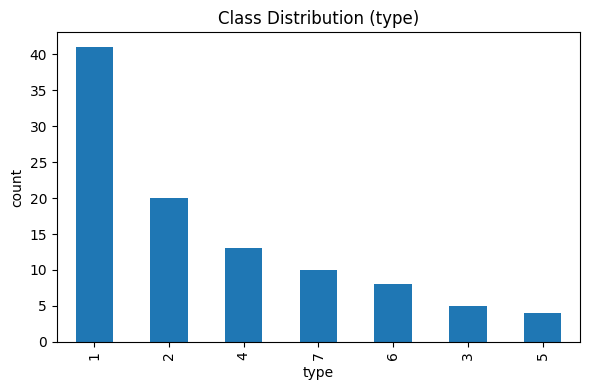

In [44]:
#Task 1:Visualizations 
#Target distribution
plt.figure(figsize=(6,4))
df['type'].value_counts().plot(kind='bar')
plt.title("Class Distribution (type)")
plt.xlabel("type")
plt.ylabel("count")
plt.tight_layout()
plt.show()

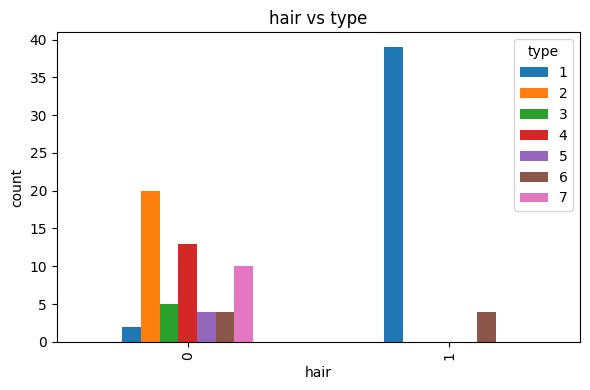

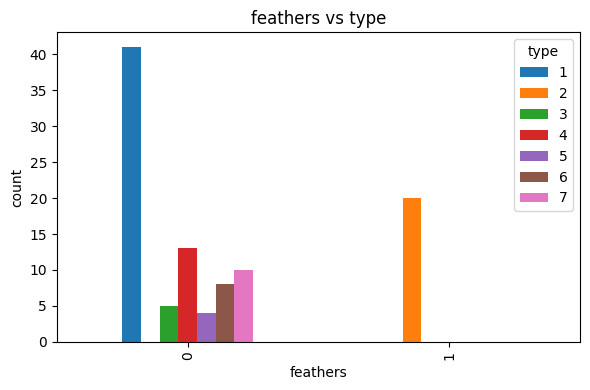

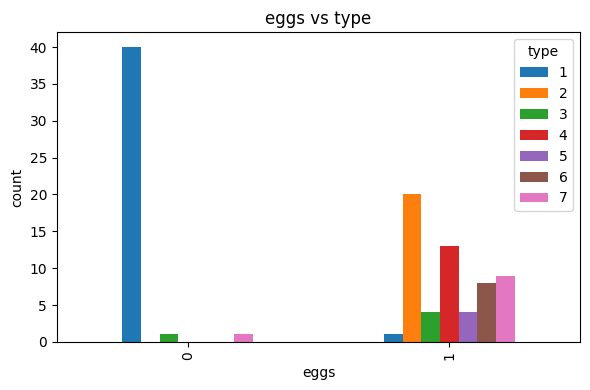

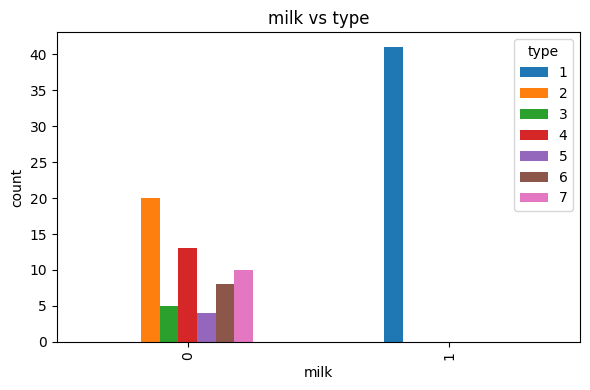

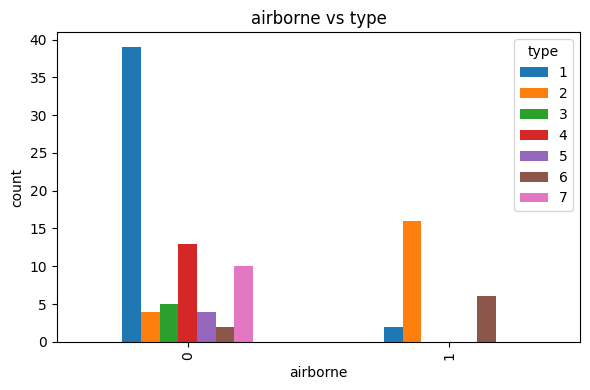

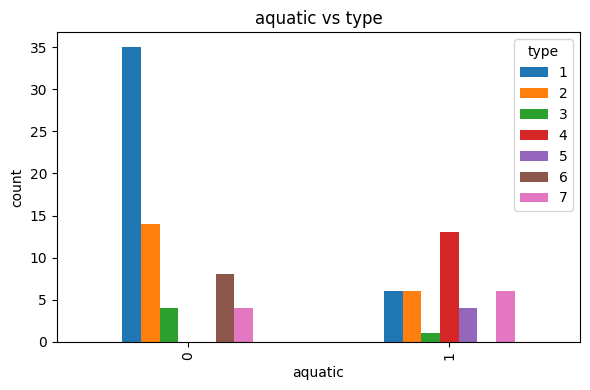

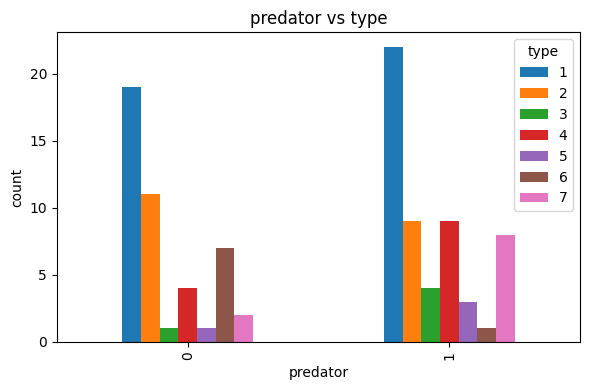

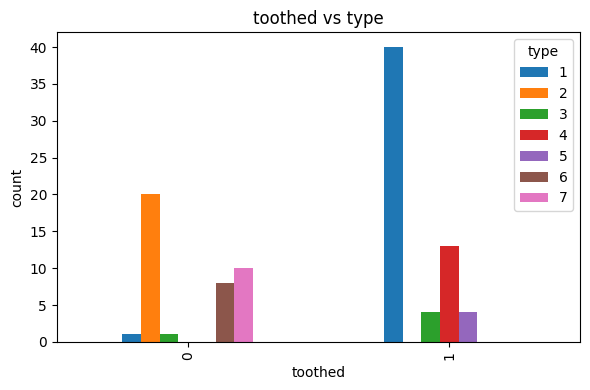

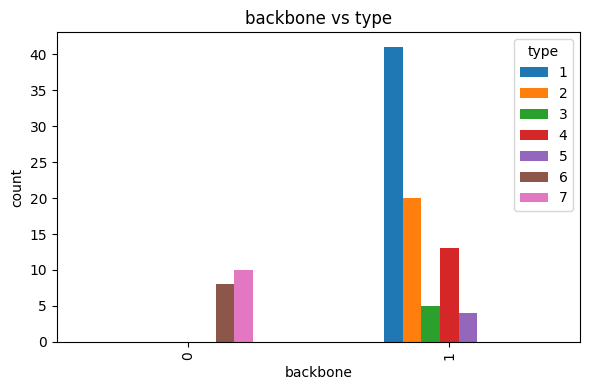

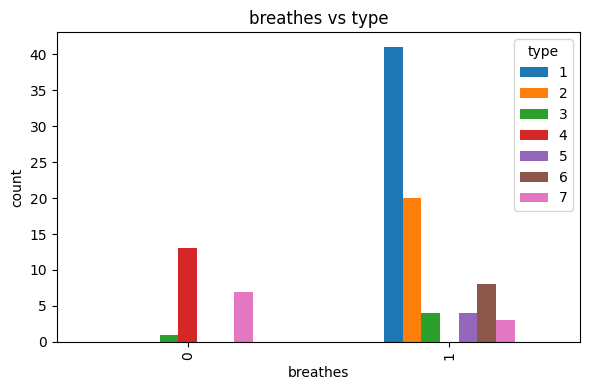

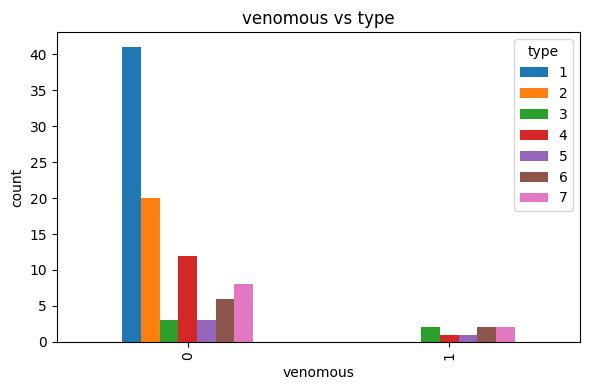

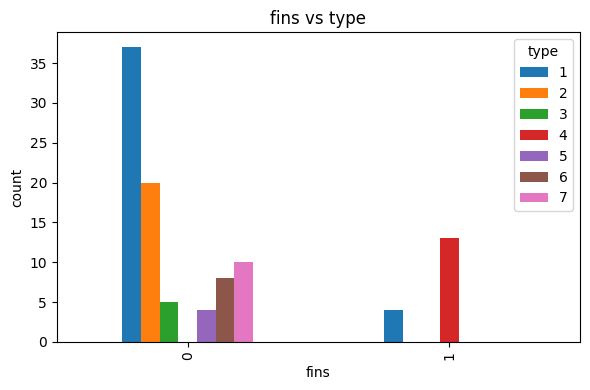

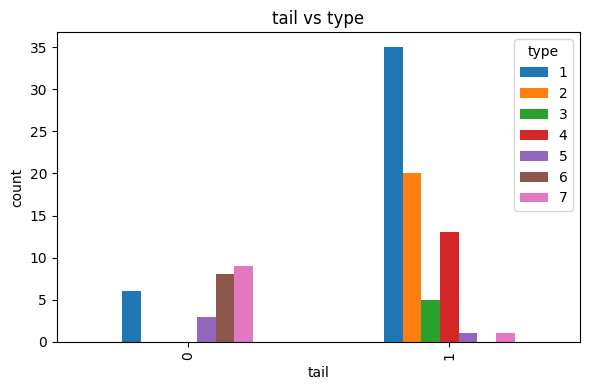

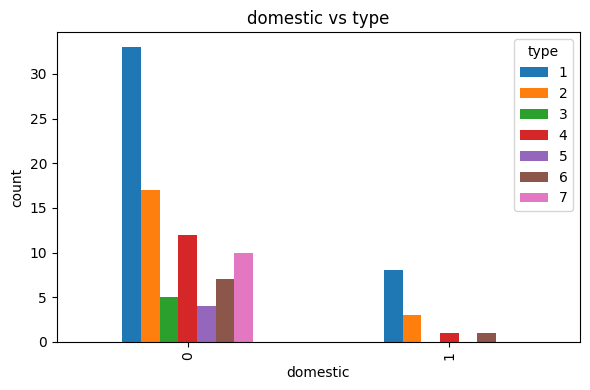

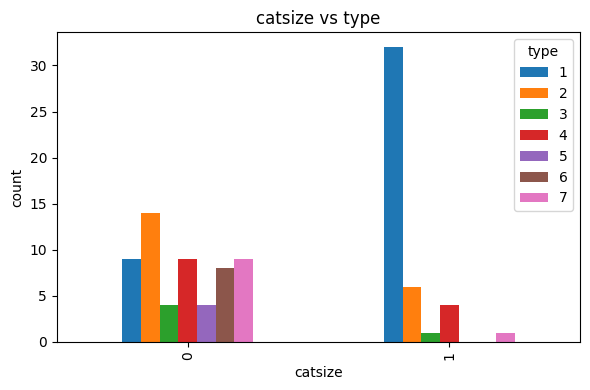

In [45]:
#bar plots for binary features vs type
features=['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous',
'fins','tail','domestic','catsize']
for f in features:
    plt.figure(figsize=(6,4))
    pd.crosstab(df[f],df['type']).plot(kind='bar',ax=plt.gca())
    plt.title(f+" vs type")
    plt.xlabel(f)
    plt.ylabel("count")
    plt.tight_layout()
    plt.show()

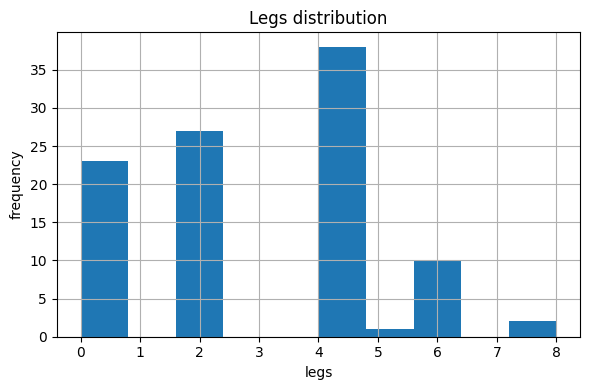

In [46]:
#histogram for legs
plt.figure(figsize=(6,4))
df['legs'].hist(bins=10)
plt.title("Legs distribution")
plt.xlabel("legs")
plt.ylabel("frequency")
plt.tight_layout()
plt.show()

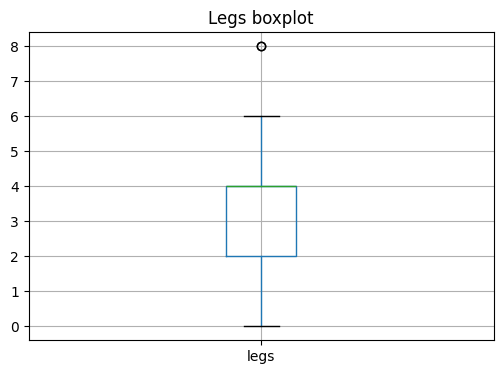

In [47]:
#Boxplot for legs
plt.figure(figsize=(6,4))
df.boxplot(column='legs')
plt.title("Legs boxplot")
plt.show()

In [48]:
df.corr(numeric_only=True)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


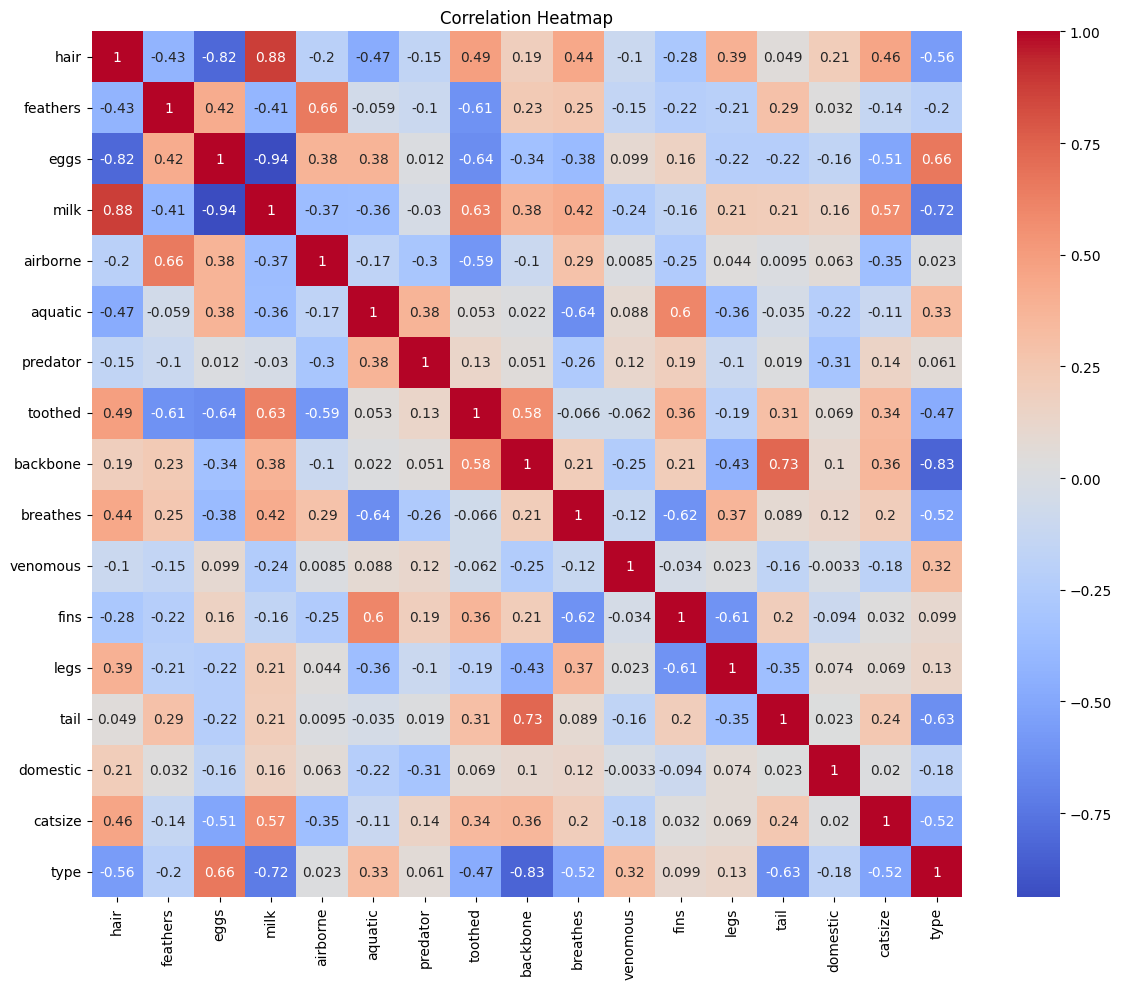

In [49]:
#correlation heatmap with annotations
plt.figure(figsize=(12,10))
corr=df.drop(columns=['animal name']).corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [50]:
#Task 2: Preprocessing
df.isna().sum()   #missing values

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [51]:
#check outliers in legs
print("unique legs values:",df['legs'].unique())

unique legs values: [4 0 2 6 8 5]


In [52]:
#drop animal name
X=df.drop(columns=['animal name','type'])
y=df['type']

In [53]:
#scale features (important for distance-based models)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [54]:
#Task 3: train-test split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42,stratify=y)

print("train size:",X_train.shape[0]," test size:",X_test.shape[0])

train size: 80  test size: 21


In [55]:
#Task 4: KNN implementation
#check accuracy for different k values
k_range=range(1,21)
cv_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    cv_scores.append(scores.mean())

c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning:

In [56]:
#find best k
best_k=k_range[int(np.argmax(cv_scores))]
print("best k:",best_k)

best k: 1


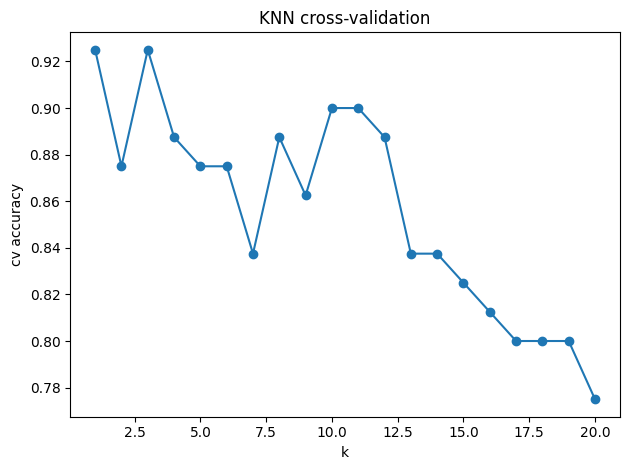

In [57]:
#plot k vs accuracy
import matplotlib.pyplot as plt
plt.figure()
plt.plot(k_range,cv_scores,marker='o')
plt.xlabel("k")
plt.ylabel("cv accuracy")
plt.title("KNN cross-validation")
plt.tight_layout()
plt.show()

In [58]:
#Task 5: train with best k
knn=KNeighborsClassifier(n_neighbors=best_k,metric='euclidean')
knn.fit(X_train,y_train)
acc=knn.score(X_test,y_test)
print("test accuracy:",acc)

test accuracy: 1.0


In [59]:
#Task 6: Evaluation
y_pred=knn.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Confusion Matrix:
[[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]


In [60]:
print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [61]:
#Task 7: Decision Boundaries (PCA 2D)
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

In [62]:
#retrain on PCA-reduced space
X_train_p,X_test_p,y_train_p,y_test_p=train_test_split(X_pca,y,test_size=0.2,random_state=42,stratify=y)
knn2=KNeighborsClassifier(n_neighbors=1,metric='euclidean')
knn2.fit(X_train_p,y_train_p)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [63]:
#meshgrid for decision boundary
x_min,x_max=X_pca[:,0].min()-1,X_pca[:,0].max()+1
y_min,y_max=X_pca[:,1].min()-1,X_pca[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.05),np.arange(y_min,y_max,0.05))
Z=knn2.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

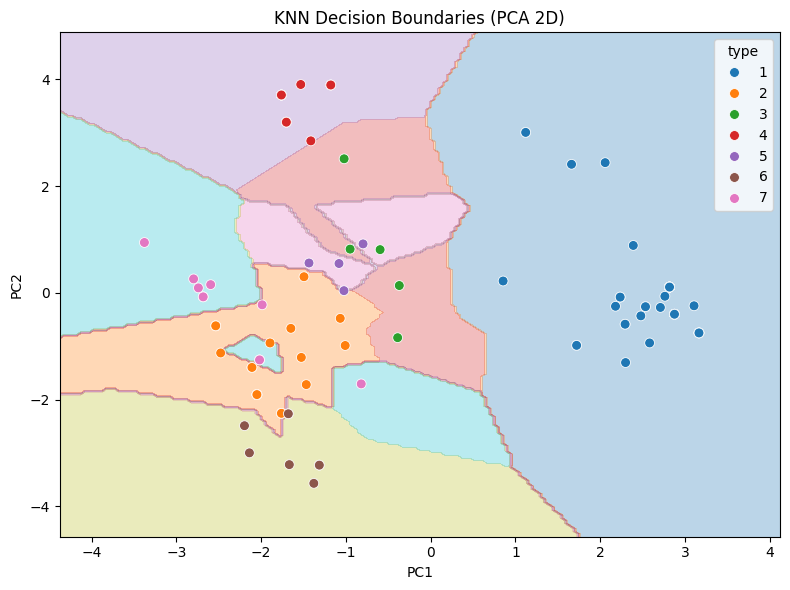

In [64]:
plt.figure(figsize=(8,6))
# Add contour fill to PCA decision boundary
plt.contourf(xx,yy,Z,alpha=0.3,cmap="tab10")
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=y,palette="tab10",s=50)
plt.title("KNN Decision Boundaries (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

##### Why PCA was used for decision boundaries

* In our dataset we have 16 input features (like hair, feathers, milk, legs, etc.).  
* Since decision boundary plots can only be drawn in 2D or 3D space, it is not possible to directly visualize how KNN separates classes in the original high-dimensional space.
* To solve this, I applied **PCA (Principal Component Analysis)** which reduces the dataset to 2 main components that capture the maximum variation in the data. 
* This way, I could plot the decision boundaries and show how KNN works in a simplified 2D space.
* It is important to note that PCA is only used here for **visualization purpose only**. 
* The actual KNN model was trained on the full scaled dataset with all original features to get the best accuracy.  
* To address the feedback, I have also added a small example of decision boundaries using two original features (legs and tail) just to show how it looks in the real feature space.


In [ ]:
#Decision boundary with 2 original features (example: legs and tail)
#Now trying with 2 original features just to see decision boundary
#I am choosing "legs"(index 12), tail(index 13)
X_two=X_scaled[:,[12,13]]  # legs and tail
X_train2,X_test2,y_train2,y_test2=train_test_split(X_two,y,test_size=0.2,random_state=42,stratify=y)

In [66]:
#train knn with best k
knn_two=KNeighborsClassifier(n_neighbors=best_k)
knn_two.fit(X_train2,y_train2)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [67]:
#make grid for plotting
x_min,x_max=X_two[:,0].min()-1,X_two[:,0].max()+1
y_min,y_max=X_two[:,1].min()-1,X_two[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.05),np.arange(y_min,y_max,0.05))

Z=knn_two.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

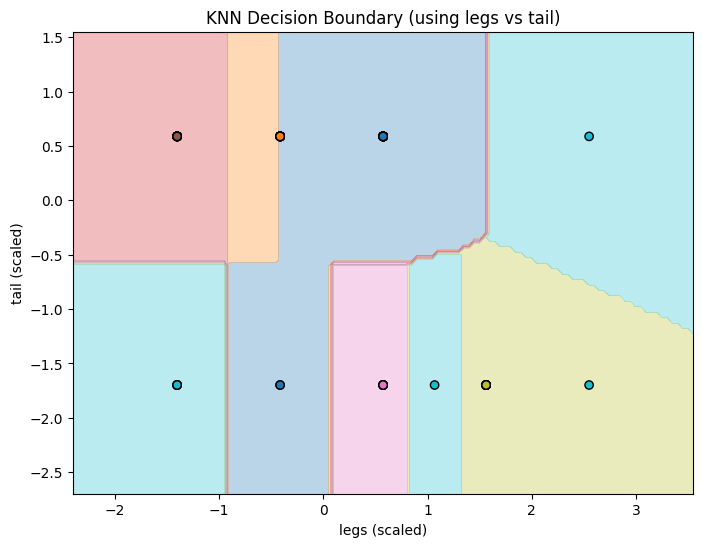

Note: PCA was used for visualization since the dataset is high-dimensional.
Here we also showed decision boundaries on two original features (legs vs tail).


In [ ]:
#plot decision boundary for legs vs tail
plt.figure(figsize=(8,6))
plt.contourf(xx,yy,Z,alpha=0.3,cmap="tab10")
plt.scatter(X_two[:,0],X_two[:,1],c=y,cmap="tab10",edgecolor="k")
plt.title("KNN Decision Boundary (using legs vs tail)")
plt.xlabel("legs (scaled)")
plt.ylabel("tail (scaled)")
plt.show()

print("Note: PCA was used for visualization since the dataset is high-dimensional.")
print("Here we also showed decision boundaries on two original features (legs vs tail).")

#### Negative values meaning:
* In the original dataset, features like legs and tail are never negative.
* The negative values in the plot come from scaling (StandardScaler).
* Scaling changes the values into standard scores (z-scores): 
    - Negative value = below the mean  
    - Positive value = above the mean  
    - Zero = exactly the mean  
* So the plot is not showing real leg or tail counts, but the scaled version used by the KNN model.

#### Note on PCA vs Original Features

* When we use PCA, we reduce all the features into 2 main components that capture most of the variance.  
* This helps us see the overall decision boundary of the KNN model in a clearer way.  

* If we don’t use PCA and instead pick only 2 features (like legs vs tail), the decision boundary may look very different and sometimes not as smooth.  
* This happens because we are only looking at a small part of the data, and other features are ignored.  

* So, PCA is mainly for better visualization of the whole dataset, while using original features like legs vs tail just shows how the classifier separates classes in that limited view.

### Interview Questions:

**1. What are the key hyperparameters in KNN?**  
KNN is a simple algorithm but it has a few hyperparameters that strongly affect its performance:  

- **k (number of neighbors):**  
  - It decides how many nearest neighbors are looked at when predicting the class of a new point.  
  - Small k (like 1 or 3): makes the model very sensitive to noise, so it can overfit.  
  - Large k (like 15 or 20): smooths out predictions, but may underfit because it ignores local details.  

- **Distance metric:**  
  - Since KNN works by finding "closeness," the way distance is calculated is critical.
  - Choosing Euclidean, Manhattan, or others changes how the algorithm sees similarity.  

- **Weights:**  
  - We can give each neighbor equal importance(uniform) or give closer neighbors more weight(distance-based). 
  - The weighted option often improves results when some points are much nearer than others.  

---

**2. What distance metrics can be used in KNN?**  
KNN can use different ways to measure distance or similarity:  

- **Euclidean distance:**  
  This is the straight-line distance. It’s the default and works well in most cases.  

- **Manhattan distance(L1 norm):**  
  Calculates distance as the sum of absolute differences, like moving along city blocks (grid-based).  

- **Minkowski distance:**  
  A generalized form that includes both Euclidean (p=2) and Manhattan (p=1).  

- **Cosine similarity/distance:**  
  Focuses on the angle between vectors rather than their length. It’s very useful in text and document data where direction matters more than size.  

- **Hamming distance:**  
  Used for categorical data, it counts the number of positions where values differ (like comparing strings or binary features).  

In practice, **Euclidean** is most common for numeric data, while **Hamming** is used for categorical, and **Cosine** for text or high-dimensional data.
